In [2]:
import pandas as pd
import numpy as np

In [3]:
#read the data
df= pd.read_csv("ks-projects-201612.csv",encoding='latin-1')

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,ID,Unnamed: 16
count,3.237500e+05,1.0
mean,1.074943e+09,25.0
std,6.193352e+08,NaN
min,5.971000e+03,25.0
25%,5.375802e+08,25.0
50%,1.075818e+09,25.0
75%,1.611070e+09,25.0
max,2.147476e+09,25.0


### Get Encoding 

#### chardet library

In [ ]:
import chardet
#detect the encoding of the file
with open("ks-projects-201612.csv", 'rb') as rawdata: #read file as binary
    result = chardet.detect(rawdata.read(10000))
print("result of detection: ", result)
print("Encoding: ", result['encoding'])    

result of detection:  {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Encoding:  Windows-1252


#### <b>Moore Data <b>

In [ ]:
df2=pd.read_csv("moore.csv",encoding='latin-1')
df2.head()

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


In [ ]:
#input headers
df2.columns=['year','transistors']

In [ ]:
df2

,year,transistors
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500
...,...,...
156,2017,18000000000
157,2017,19200000000
158,2018,8876000000
159,2018,23600000000


<AxesSubplot:>

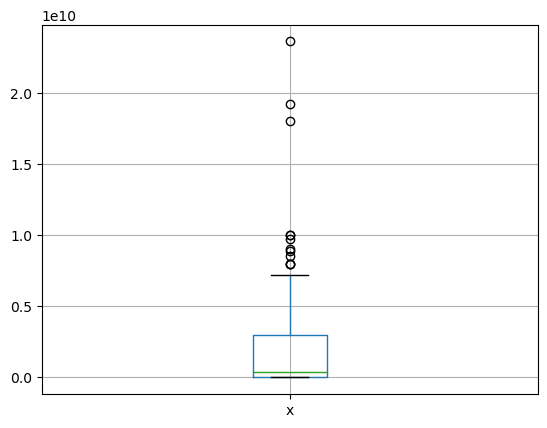

In [ ]:
pd.plotting.boxplot(df2.transistors)

<AxesSubplot:>

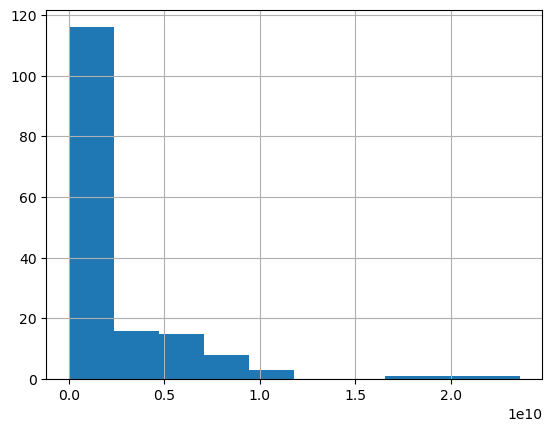

In [ ]:
pd.plotting.hist_series(df2.transistors)

### <b>Correlation<b>

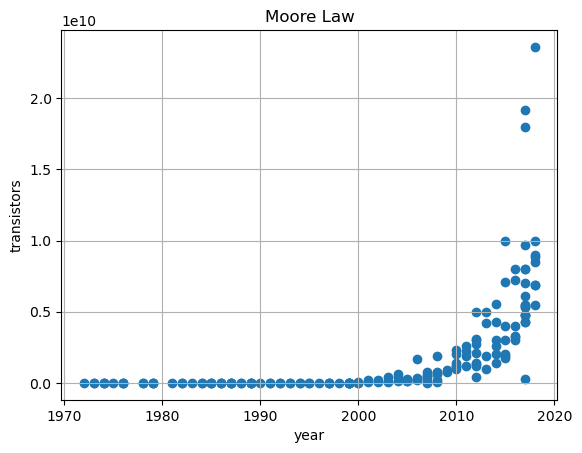

,year,transistors
year,1.000000,0.577046
transistors,0.577046,1.000000


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2.year,df2.transistors)
plt.xlabel('year')
plt.ylabel('transistors')
plt.title('Moore Law')
plt.grid(True)
plt.show()
df2.corr()

                 year  transistors
year         1.000000     0.980099
transistors  0.980099     1.000000


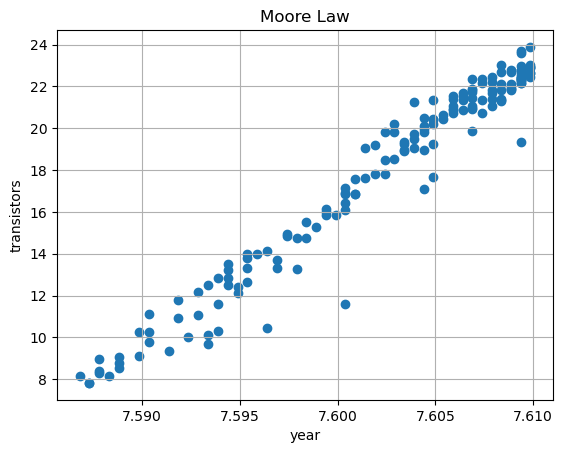

In [ ]:

#turn the year into a log scale ⁡⁢⁣⁣𝗟𝗶𝗻𝗲𝗮𝗿⁡ 
df2['year']=np.log(df2['year'])
df2['transistors']=np.log(df2['transistors'])
corr= df2.corr()
print(corr)
plt.scatter(df2.year,df2.transistors)
plt.xlabel('year')
plt.ylabel('transistors')
plt.title('Moore Law')
plt.grid(True)
plt.show()


# Min Max Scaling

In [ ]:
df_min_max=(df2-df2.min() )/(df2.max() -df2.min())


In [ ]:
df_min_max

,year,transistors
0,0.000000,0.020950
1,0.021986,0.000000
2,0.021986,0.000000
3,0.043961,0.030802
4,0.043961,0.036598
...,...,...
156,0.978504,0.983134
157,0.978504,0.987153
158,1.000000,0.939112
159,1.000000,1.000000


# Z-Score

In [ ]:
#z-score
z_score=(df2-df2.mean())/df2.std()

In [ ]:
z_score.tail()

,year,transistors
156,1.078433,1.226282
157,1.078433,1.239960
158,1.151740,1.076448
159,1.151740,1.283687
160,1.151740,1.079388


# Robust

In [ ]:
#robust
robust=(df2-df2.median())/(df2.quantile(0.75)-df2.quantile(0.25))

In [ ]:
robust

,year,transistors
0,-1.601730,-1.442182
1,-1.555573,-1.484207
2,-1.555573,-1.484207
3,-1.509439,-1.422419
4,-1.509439,-1.410792
...,...,...
156,0.452509,0.487922
157,0.452509,0.495983
158,0.497636,0.399615
159,0.497636,0.521754


In [ ]:
print("mean of year: ", df2.year.mean())
print("df_min_max of year: ", df_min_max.year.mean())
print("z_score of year: ", z_score.year.mean())
print("robust of year: ", robust.year.mean())


mean of year:  7.602074715519053
df_min_max of year:  0.6622751082566604
z_score of year:  1.14153820971477e-12
robust of year:  -0.21137203202411495


In [ ]:
#std
print("std of year: ", df2.year.std())
print("df_min_max of year: ", df_min_max.year.std())
print("z_score of year: ", z_score.year.std())
print("robust of year: ", robust.year.std())

std of year:  0.006761495900385404
df_min_max of year:  0.2932301449445318
z_score of year:  0.9999999999999994
robust of year:  0.6155972788532911


In [ ]:
plt.scatter(df_min_max.year,df_min_max.transistors)

NameError: name 'plt' is not defined